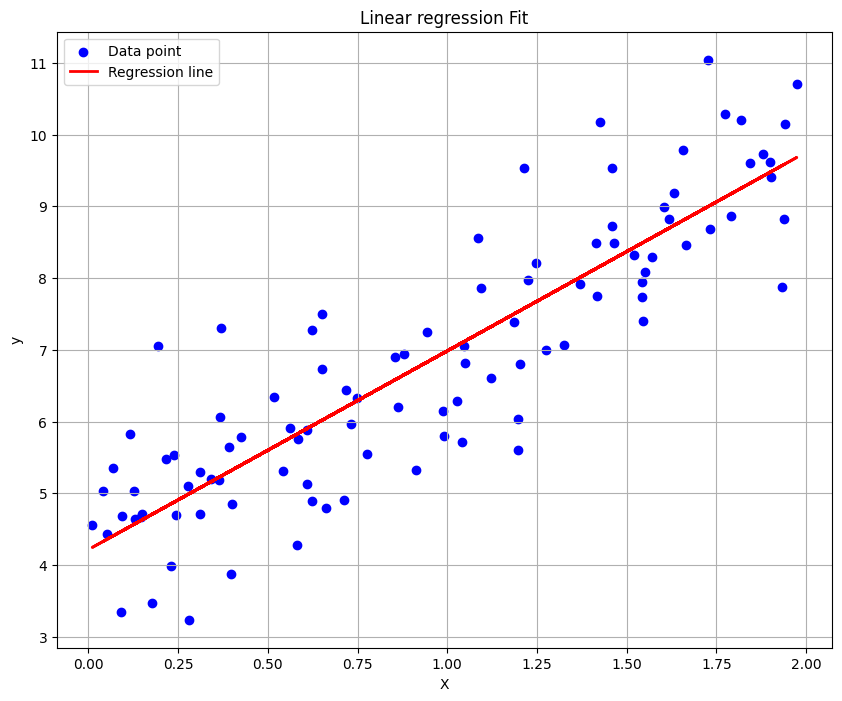

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a Linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1) #Training X
y = 4 + 3 * X + np.random.randn(100, 1) # using np.random.randn(100, 1) we are adding a noise to true line. This is tarining y

# Fitting a linear regression
model = LinearRegression()
model.fit(X,y)

y_predicted = model.predict(X) # optimal weights (w - learning_rate * gradients) being multplied with an addition of bias

#Plotting 

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='blue', label = 'Data point') # it will always plot data points, not a line
plt.plot(X, y_predicted, color='red', linewidth=2, label='Regression line') # it will plot a line always
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear regression Fit")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [51]:
y

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7

plt.scatter(X,y,label='Data')
plt.plot(X,y_predicted,color='r',linewidth=2)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Linear Regression Model")
plt.show() # must to get your final plot

#### Implementation of model

#### importing the libraries and datasets

In [52]:
import numpy as np
from sklearn.datasets import load_diabetes # It is regression dataset. Can experiment wit other datasets from Kaggle or UCI ML Datasets 
                                           #                                                       https://archive.ics.uci.edu/datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [53]:
# Loading the dataset

data = load_diabetes()
X = data.data # shape = (442, 10)
y = data.target # shape = (442,)

In [54]:
print(X.shape, y.shape)

(442, 10) (442,)


### total 442 data points
#### 88 to be used for testing and will be unseen for the algorithm. Will test these datapoints after training is done
#### 354 is remaining for training

#### X_train = (354,10) and y_train = (354, 1)
#### X_test = (88, 10) and y_test or y_true = (88, 1)

In [55]:
# Spliting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state=42 used to reproduce the value on
                                                                                           # on other machine as well. Fixing it we can get value 
                                                                                            # across every other machine

In [56]:
y_train[0:5]

array([144., 150., 280., 125.,  59.])

In [57]:
# Scaling the feature called as stanardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

In [58]:
X_train.shape

(353, 10)

### Step 1: Initialize your weights and bias(parameters)

In [59]:
# Initialzing the weights(w or m) and biases(b or c)
num_features = X_train.shape[1]
w = np.zeros(num_features) # Initialzing the weights with 0 for all the inputs
b = 0

In [60]:
w.size

10

#### There are n+1 parameters for n dimensional input. n weights + 1 bias that will count as n+1 parameters

### Step 2: Computing the optimal m(weights) and c(bias) which will be calculated using partial derivative
### Step 3: Keep on updating m(referred as w) and c(referred as b) till the last epoch(iteration)

In [61]:
# Training hyperparameters=

learning_rate = 0.01
epochs = 10001

In [62]:
# Calculating the gradient descent of all the weights and biases. After that we will use them for training loop. Every input
# has some weights and biases associated

for epoch in range(epochs):
    # Predicted values

    y_predicted = X_train.dot(w) + b # y = mx + c. y_predicted is for training dataset

    #Calculate gradients for all iterations(epochs)
    error = y_predicted - y_train   # y_train is training output and y_pred is one that we are predicting, so error is calculated this way
    dw = (1 / len(X_train)) * X_train.T.dot(error) # dJ/dm => J = yi - (mxi + c)
    db = (1 / len(X_train)) * np.sum(error)  # dJ/dc

    # Updating the weights and biases using above gradients

    w -= learning_rate * dw # w = w - learning_rate * dw
    b -= learning_rate * db

    #printing loss for every 1000 epoch
    if epoch % 1000 == 0:
        mse = np.mean(error ** 2)
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

Epoch 0: MSE = 1.0000
Epoch 1000: MSE = 0.4764
Epoch 2000: MSE = 0.4757
Epoch 3000: MSE = 0.4751
Epoch 4000: MSE = 0.4746
Epoch 5000: MSE = 0.4741
Epoch 6000: MSE = 0.4738
Epoch 7000: MSE = 0.4735
Epoch 8000: MSE = 0.4733
Epoch 9000: MSE = 0.4731
Epoch 10000: MSE = 0.4729


In [63]:
# Evaluate on test set, multiply the test data with model param
y_predicted_scaled = X_test.dot(w) + b
y_predicted = scaler.inverse_transform(y_predicted_scaled.reshape(-1,1)).flatten() # reshape(-1,1) is mandatory
# Test error will be deviation of y_predicted from y_test
test_mse = np.mean((y_predicted - y_test) ** 2)


In [64]:
test_mse

np.float64(22929.43776892693)